## Build Custom Arabic WordCloud (WordTag)

To build your custom Arabic wordcloud. We will be using few supporting libraries to acomplish this task.
The followings are the steps to get our objactive done:
1. Load necessary libraries:

In [2]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

# Start with loading all necessary librarie
import os
import numpy as np
import pandas as pd
from os import path
# install: pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# install: pip install Pillow
from PIL import Image, ImageDraw, ImageFont, ImageFilter

# install: pip install --upgrade arabic-reshaper
import arabic_reshaper

# install: pip install python-bidi
from bidi.algorithm import get_display


import matplotlib.pyplot as plt
% matplotlib inline

2. Select your image and choose channel to use for masking [Optional]

In [21]:
#image_file = '../img/flower_butterfly.jpg'
#image_file = '../img/butterfly.jpeg'
image_file = '../img/background.png'
# image_file = '../img/PalmTree.png'
#image_file = '../img/PalmTreeBeach.jpg'

for i in range(1):
    print(i)
    image_mask = np.array(Image.open(image_file))[:,:,i]
    image = Image.fromarray(image_mask.astype('uint8'), 'L')
    print("Masked=",(np.count_nonzero(image_mask))/(image_mask.shape[0]*image_mask.shape[1]))
    image.save('../img/image_l'+str(i)+'.png')

0
Masked= 0.926812


3. Prepare your text. Load data from a text file

In [22]:

filename='Collection-www.al-jazirah.com.list.txt'
path = '../texts/'
df = pd.DataFrame()
lines = []
lid = 0

print("Processing: "+filename)
with open(os.path.join(path,filename), encoding='utf-8') as file:
    for line in file:
        lines.append(line.strip())
    
text = " ".join(review for review in lines)
print ("There are {} words in the combination of all review.".format(len(text)))

Processing: Collection-www.al-jazirah.com.list.txt
There are 283563 words in the combination of all review.


4. Select an appropriate threshold.

In addition to the selected channel, threshold might add or remove sections if they do not meet the criterea of the threshold.

In [23]:
threshold = 50
def transform_format(val):
    if val > threshold:
        return 0
    else:
        return 255 #val

5. Transform your mask into a new one that will work with the function

In [24]:

transformed_image_mask = np.ndarray((image_mask.shape[0],image_mask.shape[1]), np.int32)

for i in range(len(image_mask)):
    transformed_image_mask[i] = list(map(transform_format, image_mask[i]))
    

6. For inspection, you may want to save the adjusted mask

In [25]:
image = Image.fromarray(transformed_image_mask.astype('uint8'), 'L')
image.save('../outputs/image_mask_l'+str(threshold)+'.png')

7. Create the WordCloud. 

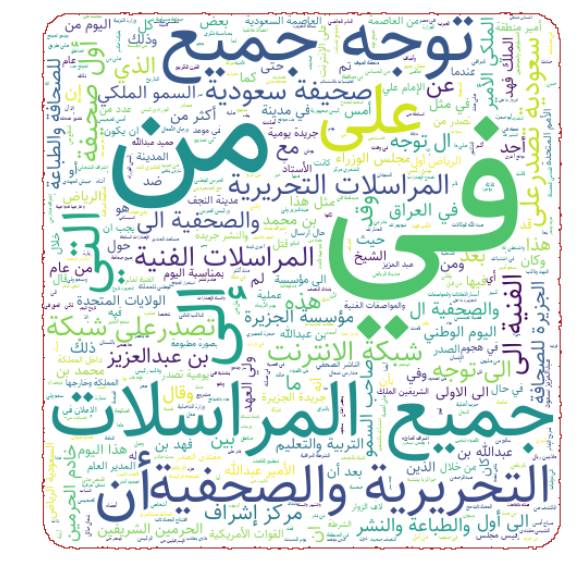

In [35]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['من','على','نأ','نم','ىلإ'])

# Create a word cloud image

# Generate a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_image_mask,
              font_path='../fonts/Sahel.ttf', collocations=True,
               stopwords=stopwords, contour_width=1, contour_color='firebrick')

unicode_text= text
reshaped_text = arabic_reshaper.reshape(unicode_text)    # correct its shape
bidi_text = get_display(reshaped_text) 

# Generate a wordcloud
wc.generate(bidi_text)

# store to file
wc.to_file("../outputs/image_maskout.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
